# Data Science intern at The Spark Foundation 

## Exploratory Data Analysis - Retail

## Retail Data Analysis of SampleSuperstore 

### Made By - Swati Chaurasia

#### Importing Required Libraries

In [1]:
#Data Manipulation
import pandas as pd 

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing the dataset

In [2]:
retail = pd.read_csv('C:/Users/chaur/Desktop/internship/SampleSuperstore.csv')

In [3]:
# First five rows of dataset
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Total number of rows and columns
retail.shape

(9994, 13)

In [5]:
# Columns present in dataset
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# A concise summary of dataset
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Checking missing values
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Getting descriptive summary statistics for numerical columns in dataset

In [8]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


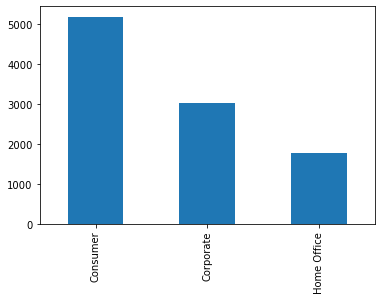

In [9]:
retail['Segment'].value_counts().plot(kind= 'bar')

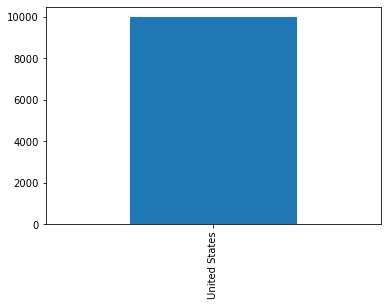

In [10]:
retail['Country'].value_counts().plot(kind= 'bar')

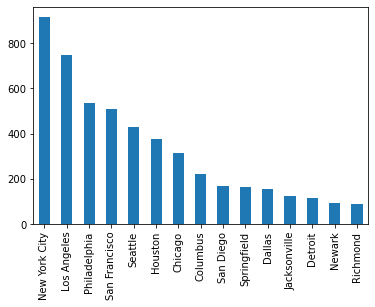

In [11]:
retail['City'].value_counts().sort_values(ascending= False).head(15).plot(kind= 'bar')

New York leads in United States in terms of retail businesses followed by LA , Philadelphia and SF.

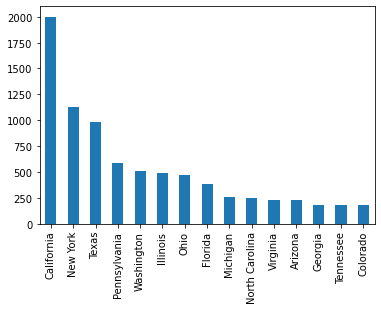

In [12]:
retail['State'].value_counts().sort_values(ascending= False).head(15).plot(kind= 'bar')

California is the leading city in terms of retail .

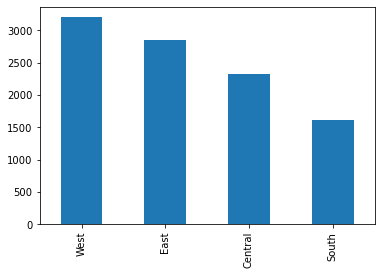

In [13]:
retail['Region'].value_counts().sort_values(ascending= False).head(15).plot(kind= 'bar')

In [14]:
df = pd.DataFrame(retail)

In [15]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


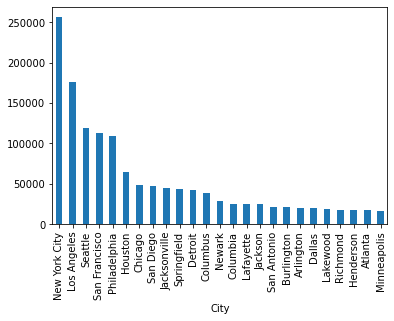

In [16]:
df.groupby('City')['Sales'].sum().sort_values(ascending= False).head(25).plot(kind= 'bar')

New York City receives most sales among all retail businesses in US.

#### Exploratory Data Analysis

In [18]:
# Most selling product category 
most_selling_prod_cat = df.groupby('Category')['Quantity'].sum()

In [19]:
most_selling_prod_cat.sort_values(ascending = False)

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64

#### Most Preffered Ship Mode

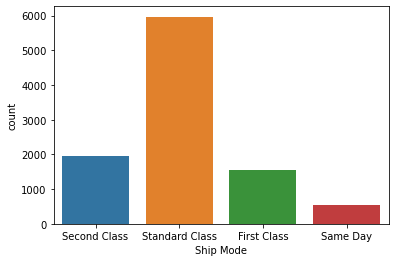

In [20]:
# Plotting ship mode 
sns.countplot(df['Ship Mode'])

In [21]:
# Grouping category and sub category
cat_subcat_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()
# Sorting the result
cat_subcat_profit.sort_values(ascending= False)

Category         Sub-Category
Technology       Copiers         55617.8249
                 Phones          44515.7306
                 Accessories     41936.6357
Office Supplies  Paper           34053.5693
                 Binders         30221.7633
Furniture        Chairs          26590.1663
Office Supplies  Storage         21278.8264
                 Appliances      18138.0054
Furniture        Furnishings     13059.1436
Office Supplies  Envelopes        6964.1767
                 Art              6527.7870
                 Labels           5546.2540
Technology       Machines         3384.7569
Office Supplies  Fasteners         949.5182
                 Supplies        -1189.0995
Furniture        Bookcases       -3472.5560
                 Tables         -17725.4811
Name: Profit, dtype: float64

#### Order Based on Quantity

In [22]:
top15_city_byquantity = df.groupby(['Country', 'City'])['Quantity'].sum().sort_values(ascending= False)[:15]
top15_city_byquantity

Country        City         
United States  New York City    3417
               Los Angeles      2879
               Philadelphia     1981
               San Francisco    1935
               Seattle          1590
               Houston          1466
               Chicago          1132
               Columbus          836
               San Diego         670
               Springfield       649
               Dallas            555
               Detroit           441
               Jacksonville      429
               Newark            362
               Richmond          336
Name: Quantity, dtype: int64

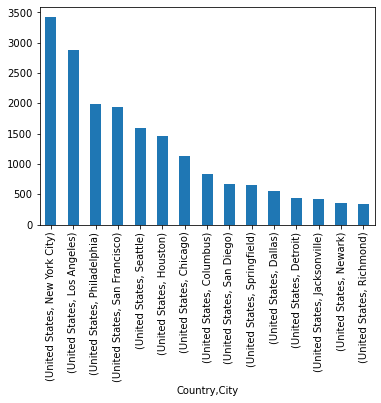

In [23]:
top15_city_byquantity.plot(kind = 'bar')

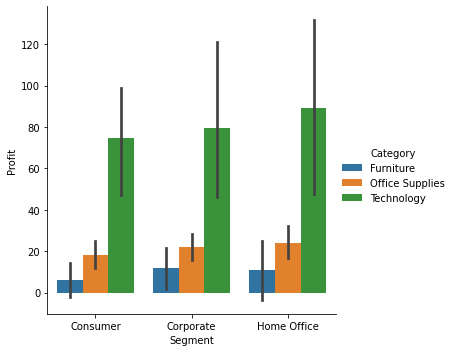

In [24]:
sns.catplot( x= 'Segment', y = 'Profit', data = retail, kind= 'bar', hue = 'Category')

Here consumer segment is making less profit compared to other categories, so it needs more attention to increase profit and revenue.


#### Profit Distribution by Region

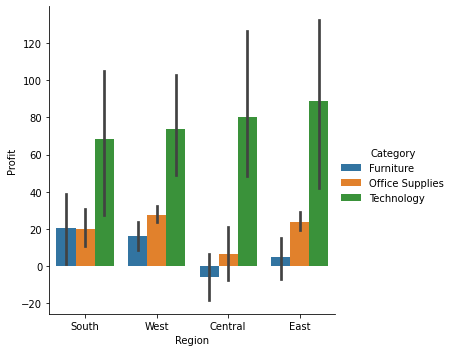

In [25]:
sns.catplot( x= 'Region', y = 'Profit', data = retail, kind= 'bar', hue = 'Category')

Here furniture category is loss making sector and only in central region.

In [26]:
# Group data by region and slice data only for central region
data_central = df[df['Region']=='Central']
data_central.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.880,6,0.0,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884


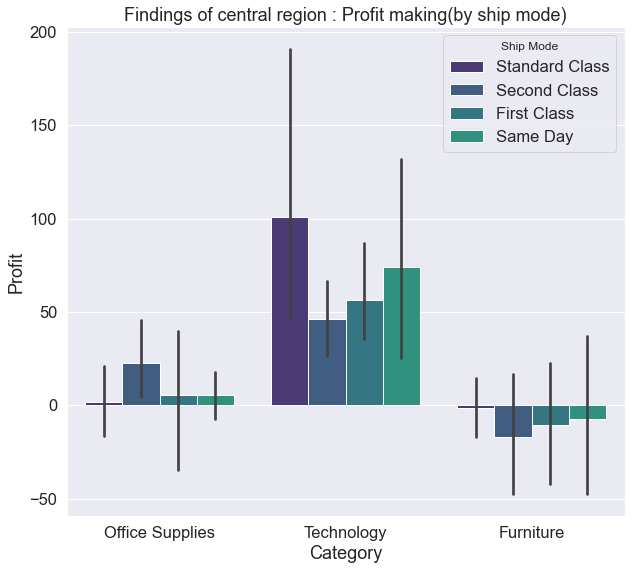

In [27]:
plt.figure(figsize = (10,9))
sns.set(font_scale= 1.5, palette= 'viridis')
sns.barplot(data= data_central, x= 'Category', y='Profit',hue='Ship Mode')
plt.title('Findings of central region : Profit making(by ship mode)')
plt.show()

Losses have occured in Furniture category irrespective of shipment mode

In [28]:
#grp_central = list(df.groupby('Region'))

In [29]:
data_central_furniture = data_central[data_central['Category']=='Furniture']

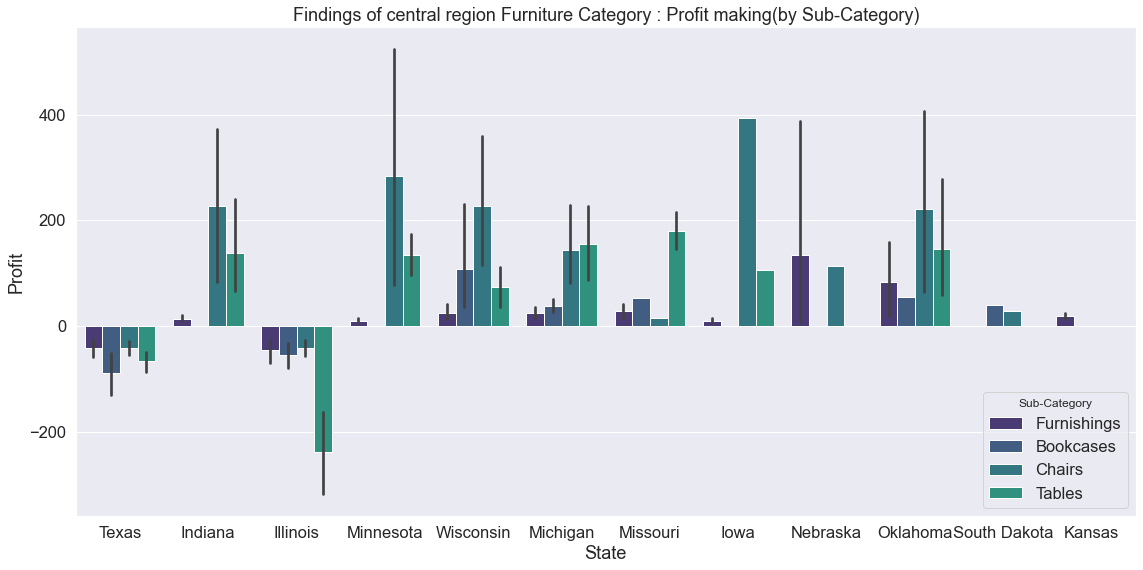

In [30]:
plt.figure(figsize = (19,9))
sns.set(font_scale= 1.5, palette= 'viridis')
sns.barplot(data= data_central_furniture, x= 'State', y='Profit',hue='Sub-Category')
plt.title('Findings of central region Furniture Category : Profit making(by Sub-Category)')
plt.show()

Here we can see that Texas and Illinois are two states with loss in furniture category irrespective of subcategory.

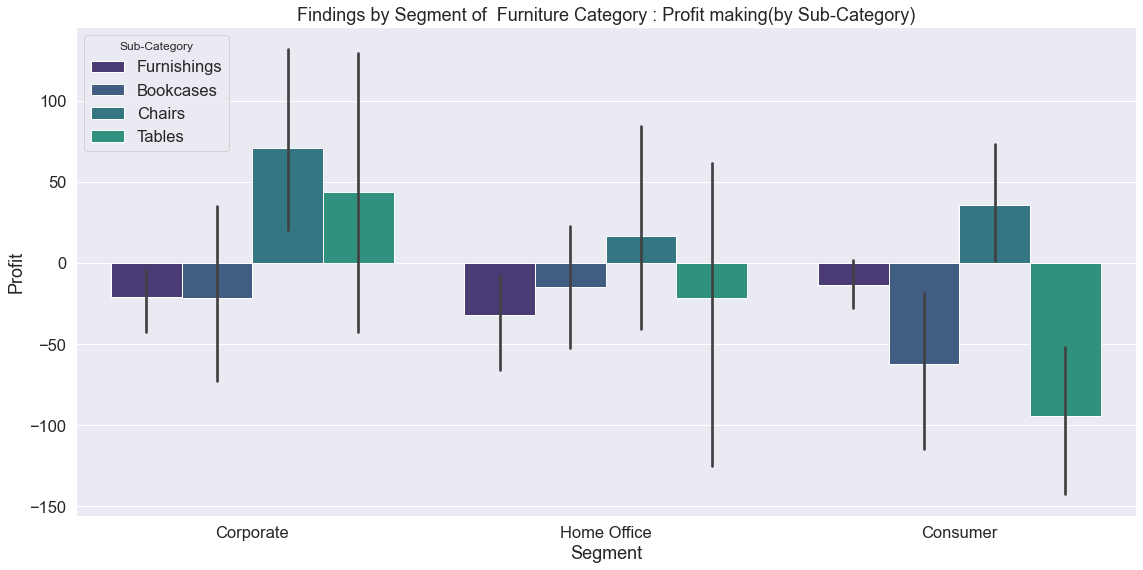

In [31]:
plt.figure(figsize = (19,9))
sns.set(font_scale= 1.5, palette= 'viridis')
sns.barplot(data= data_central_furniture, x= 'Segment', y='Profit',hue='Sub-Category')
plt.title('Findings by Segment of  Furniture Category : Profit making(by Sub-Category)')
plt.show()

Here we can see that huge losses have occured from consumer segment followed by losses in home office segment.

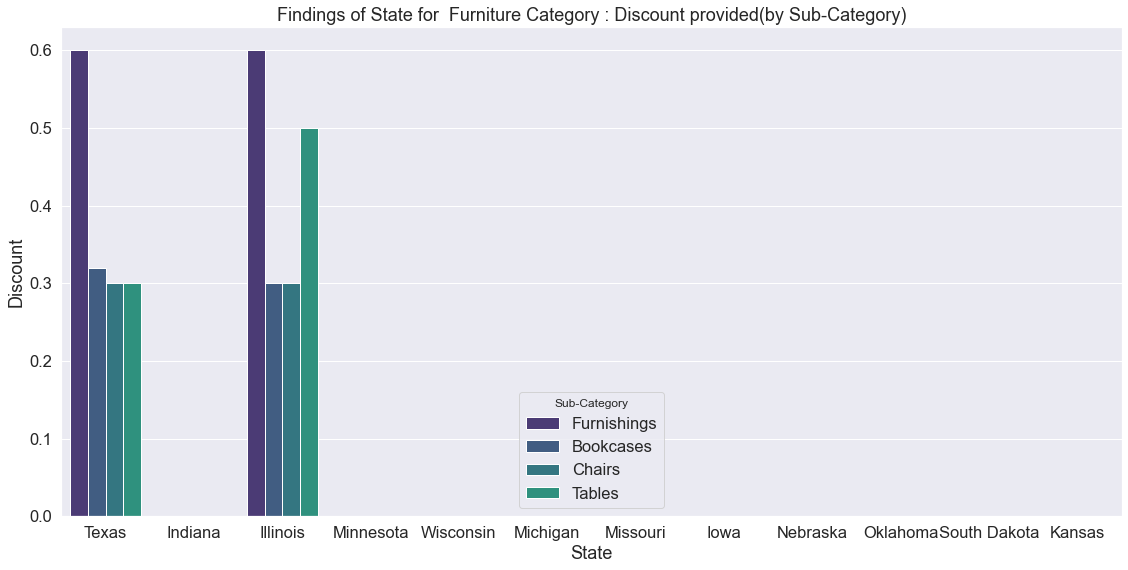

In [32]:
plt.figure(figsize = (19,9))
sns.set(font_scale= 1.5, palette= 'viridis')
sns.barplot(data= data_central_furniture, x= 'State', y='Discount',hue='Sub-Category')
plt.title('Findings of State for  Furniture Category : Discount provided(by Sub-Category)')
plt.show()

#### Here we can see the reason of huge losses occuring in Texas and Illinois in furniture category. These two states have provided huge discounts on furnishings sub category resulting in losses in central region for furniture category.

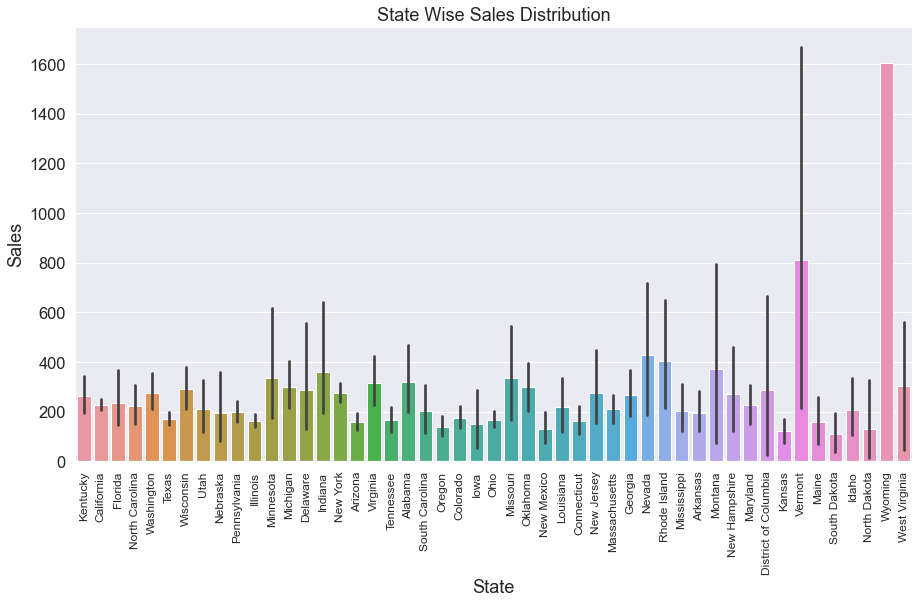

In [35]:
plt.figure(figsize=(15,8))
sns.barplot( x= 'State', y = 'Sales', data = retail)
plt.xticks(rotation = 90, fontsize= 12)
plt.title('State Wise Sales Distribution')
plt.show()

Top Ten Sales 

In [36]:
top10_sales = df.groupby('State')['Sales'].sum().nlargest(n=10)
top10_profit = df.groupby('State')['Profit'].sum().nlargest(n=10)

In [37]:
top10_sales.head

<bound method NDFrame.head of State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64>

In [38]:
top10_profit.head

<bound method NDFrame.head of State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64>

In [39]:
top10_profit.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

Text(0.5, 1.0, 'Top 10 States by Sales')

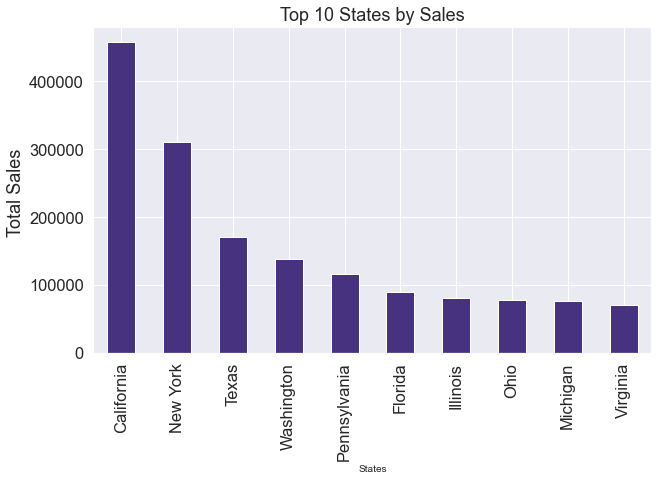

In [40]:
top10_sales.plot(kind = 'bar', figsize= (10,6))
plt.xlabel('States', fontsize=10)
plt.ylabel('Total Sales ')
plt.title('Top 10 States by Sales')

Text(0.5, 1.0, 'Top 10 States by Profits')

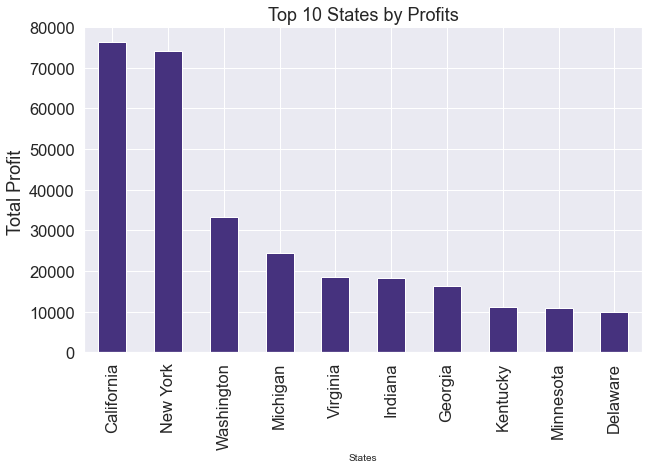

In [41]:
top10_profit.plot(kind = 'bar', figsize= (10,6))
plt.xlabel('States', fontsize=10)
plt.ylabel('Total Profit ')
plt.title('Top 10 States by Profits')

#### Pairplot to do Relational Analysis

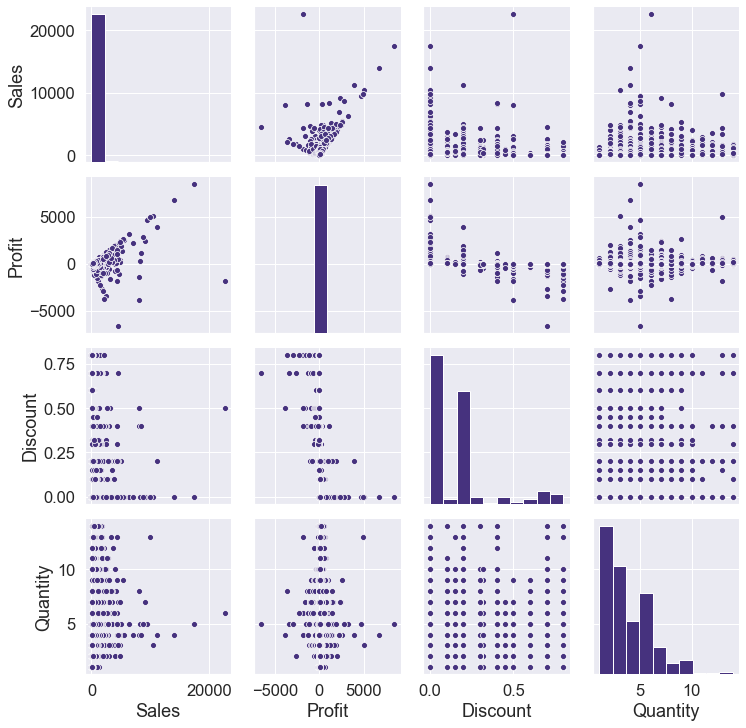

In [42]:
# To get pairplot we need numeric columns 
numeric_col= df.loc[:,['Sales','Profit', 'Discount','Quantity']]
sns.pairplot(numeric_col)

From above pairplot we can see there is some relationship between sales and profit and also there is some relationship between profit
and discount. Lets plot a heatmap to see correlation more clearly.

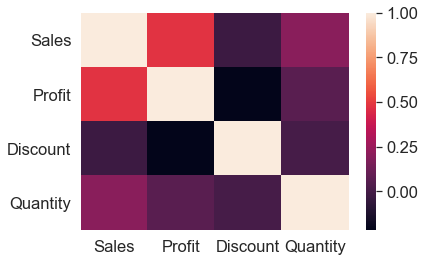

In [43]:
sns.heatmap(numeric_col.corr())

So from heatmap we can see that sales and profit are positively correlated and discount and profit are negatively correlated.

### Lets take few cases

## Case1 : When discount is 0

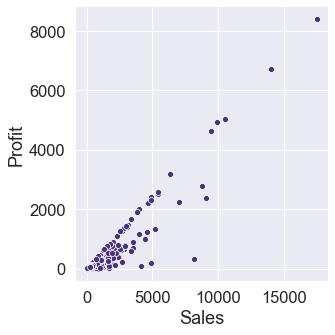

In [44]:
data = df[df['Discount']==0]
sns.relplot(x= 'Sales', y= 'Profit', data= data )

As Sales increases profit increases.

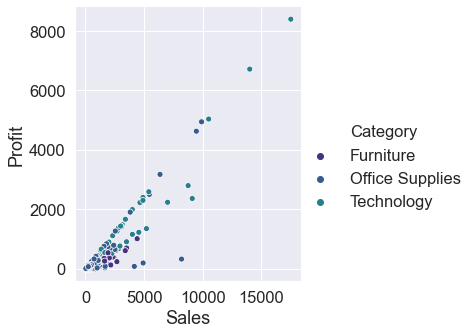

In [45]:
sns.relplot(x= 'Sales', y= 'Profit', data= data, hue= 'Category' )

### Case2: When Discount is not 0

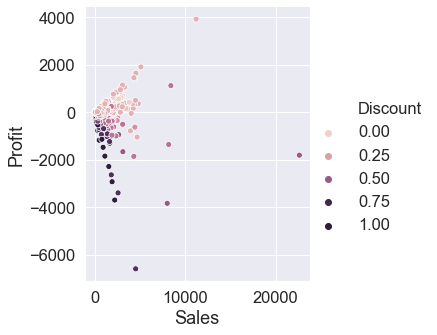

In [46]:
 data_1 = df[df['Discount']!=0]
sns.relplot(x= 'Sales', y= 'Profit', hue= 'Discount',data= data_1 )

As discount increases sales increase but profit decreases.

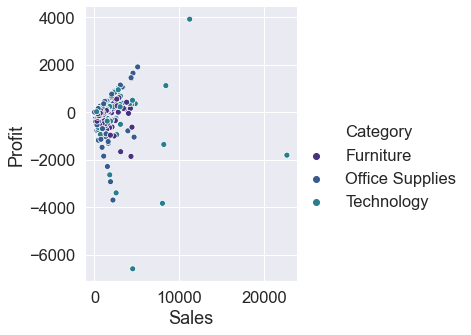

In [47]:
sns.relplot(x= 'Sales', y= 'Profit', hue= 'Category',data= data_1 )

In [48]:
data_1.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.007586,0.021747,-0.032222,0.034916
Sales,0.007586,1.000000,0.201221,-0.066797,-0.060773
Quantity,0.021747,0.201221,1.000000,0.028661,-0.028955
Discount,-0.032222,-0.066797,0.028661,1.000000,-0.243584
Profit,0.034916,-0.060773,-0.028955,-0.243584,1.000000


In [49]:
pivot = pd.pivot_table(data_1, index ='Sub-Category', values='Profit')

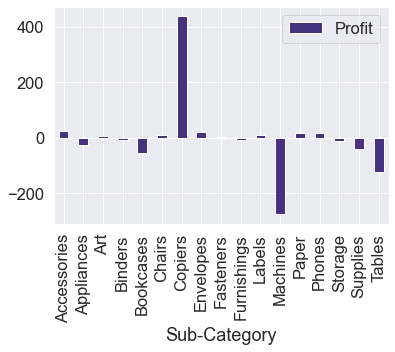

In [50]:
pivot.plot(kind= 'bar')

In [51]:
pivot_sales = pd.pivot_table(data_1, index= 'Sub-Category', values='Sales')

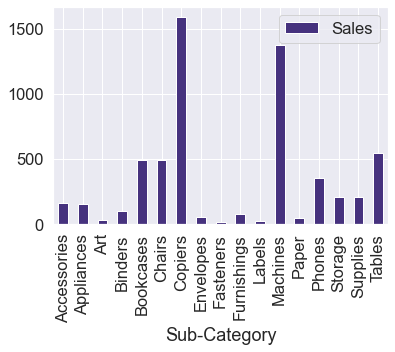

In [52]:
pivot_sales.plot(kind= 'bar')

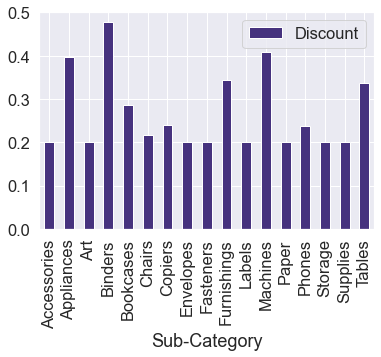

In [53]:
pivot_disc = pd.pivot_table(data_1, index= 'Sub-Category', values='Discount')
pivot_disc.plot(kind= 'bar')

 Here we can see that discount is given maximum for Binders and second maximum for Machines, but from pivot_sales plot we can see 
that Binders have not made most sales but Copiers and Machines sub category have made most sales. Now if we compare these 
 with pivot plot for profit , we see that even though sales are high for mahcines but due to huge discount, they are resulting in loses.
We also need to focus on Arts, fasteners and labels category as their sales and profit both are weak and so these sub categories need
more focus to enhance and boost growth of the company

In [54]:
# Thank you